<a href="https://colab.research.google.com/github/Sudar278/Roseman-store-sales-predction-LR-/blob/main/Roseman_store_sales_predction(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Sudar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**
#### To analyse the historical sales data for 1,115 Rossmann stores and build a machine learning model to forecast the sales of Rossmann store using Linear Regression


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [88]:
# Import Libraries
import math
import random

import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pickle

### Dataset Loading

In [89]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df_sales=pd.read_csv('/content/drive/MyDrive/Capstone_project_datas/Roseman_Data/Rossmann Stores Data.csv')
df_store=pd.read_csv('/content/drive/MyDrive/Capstone_project_datas/Roseman_Data/store.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [90]:
# Sales Dataset First Look
df_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [91]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [92]:
df_sales.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [93]:
# Sales Dataset First Look
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [94]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Dataset Rows & Columns count

In [95]:
# Store Dataset Rows & Columns count
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [96]:
# Sales Dataset Rows & Columns count
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [97]:
# Sales Dataset Duplicate Value Count
df_sales.duplicated().value_counts()

False    1017209
dtype: int64

In [98]:
# Store Dataset Duplicate Value Count
df_store.duplicated().value_counts()

False    1115
dtype: int64

#### Missing Values/Null Values

In [99]:
# Sales Missing Values/Null Values Count
df_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [100]:
# Store Missing Values/Null Values Count
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

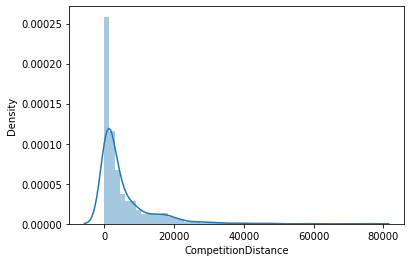

In [101]:
# Visualizing the missing values
# Visualizing the CompetitionDistance column first
sns.distplot(df_store.CompetitionDistance)

##### As we could see the CompetitionDistance column is right skewed we can replace them with median or mode. We could see that the peek value is very low so we can replace them with meadian later


In [102]:
# We could see that the CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns has same number of missing values.
# Lets check them
df_store.loc[df_store['CompetitionOpenSinceMonth'].isnull(), ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]


,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
11,NaN,NaN
12,NaN,NaN
15,NaN,NaN
18,NaN,NaN
21,NaN,NaN
...,...,...
1095,NaN,NaN
1099,NaN,NaN
1112,NaN,NaN
1113,NaN,NaN


#### We can see that CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns has null values in the same rows

In [103]:
# We will do the same for Promo2SinceWeek,Promo2SinceYear,PromoInterval columns as they also has the same number of missing values 
df_store.loc[df_store['Promo2SinceWeek'].isnull(), ["Promo2SinceWeek", "Promo2SinceYear","PromoInterval"]]

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
...,...,...,...
1107,NaN,NaN,NaN
1109,NaN,NaN,NaN
1111,NaN,NaN,NaN
1112,NaN,NaN,NaN


##### As before we can see that Promo2SinceWeek,Promo2SinceYear,PromoInterval columns has null values in the same rows

### What did you know about your dataset?

##### There are two dataset ( Store and Sales).
##### In the store dataset there are 10 columns having the details on the store, infomation about the competitors and the promotions going on in that store.
##### I could also interpret that the data is about 1115 stores.
##### In the sales dataset there are 9 columns having the details about the amount of sales done in a particular day, whether that specific day is a State or School holiday and whether any promotion is going on 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [104]:
# Filling the missing values with meadian value
df_store["CompetitionDistance"].fillna(value = df_store.CompetitionDistance.median(), inplace=True)


In [105]:
# Filling the missing values with current year and month 
df_store["CompetitionOpenSinceYear"].fillna(value = df_store.CompetitionOpenSinceYear.mode()[0], inplace=True)
df_store["CompetitionOpenSinceMonth"].fillna(value = df_store.CompetitionOpenSinceMonth.mode()[0], inplace=True)

Replacing CompetitionOpenSinceYear,and CompetitionOpenSinceYear with most repeating value

In [106]:
# Let's check whether promo2 was active while Promo2SinceWeek,Promo2SinceYear,PromoInterval contains null values 

df_store.loc[df_store['Promo2SinceWeek'].isnull(),['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1107,0,NaN,NaN,NaN
1109,0,NaN,NaN,NaN
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN


In [107]:
# As promo2 is inactive Promo2SinceWeek,Promo2SinceYear,PromoInterval are also having null values 
# Lets reconfirm
df_store['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

Number of missing values in Promo2SinceWeek,Promo2SinceYear,PromoInterval is equal to inactive promo2


In [108]:
# Let's fill the null values in Promo2SinceWeek,Promo2SinceYear,PromoInterval with zeros
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [109]:
# Now lets check our store data set for null values 
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

 Finally all the missing values have been replaced with appropiate values 


In [110]:
# Merging the dataset on the store column
df=pd.merge(df_sales,df_store,on='Store',how='left')

In [111]:
# First look on the merged dataset 
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [112]:
# checking the data types
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [113]:
# Coverting Date column from object to datetime 
df.Date=pd.to_datetime(df.Date)

In [114]:
# Looking at the values of state holiday
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [115]:
# Converting state holiday to integer format 
df.StateHoliday.replace({'0':0,'a':1,'b':1,'c':1},inplace=True)
df.StateHoliday.unique()

array([0, 1])

In [116]:
# Checking values in stateholiday column
df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [117]:
# Converting the float datatype to integer
# As distance can be decimals CompetitionDistance column can be in float     
df=df.astype({"CompetitionOpenSinceMonth":int, "CompetitionOpenSinceYear":int, "Promo2SinceWeek":int, "Promo2SinceYear":int})

In [118]:
# Looking at the Data after datatype conversion 
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

In [119]:
# Converting Date column to the respective Week of the year,Month,Year
df['week_of_year']=df['Date'].dt.week
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,week_of_year,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9,2008,0,0,0,0,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9,2009,0,0,0,0,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4,2015,0,0,0,0,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,a,...,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,c,...,1880.0,4,2006,0,0,0,0,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,a,...,9260.0,9,2013,0,0,0,0,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,a,...,870.0,9,2013,0,0,0,0,1,1,2013


In [120]:
# Creting a new feature that has moths passed since the competion shop opened 
df['Com_open_months']=(df.Year-df.CompetitionOpenSinceYear)*12+(df.Month-df.CompetitionOpenSinceMonth)
df['Com_open_months']

0           82
1           92
2          103
3           70
4            3
          ... 
1017204    -17
1017205     81
1017206     -8
1017207     -8
1017208     -8
Name: Com_open_months, Length: 1017209, dtype: int64

In [121]:
# As some store donot have competition and it is replaced by current year and month 
# So those rows are showing months in negatives values 
# Lets replace them with zeros to indicate that those stores donot have a competition store
df['Com_open_months']=df.Com_open_months.apply(lambda x: 0 if x<0 else x)
#sns.distplot(df['Com_open_months'])

<AxesSubplot:xlabel='num_weeks_frm_prm2', ylabel='Density'>

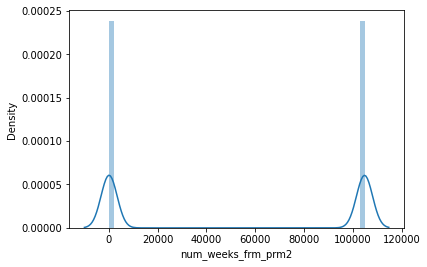

In [122]:
df['num_weeks_frm_prm2']=(df.Year-df.Promo2SinceYear)*52+(df.week_of_year-df.Promo2SinceWeek)
sns.distplot(df['num_weeks_frm_prm2'])

In [123]:
# From the above visualization its clear that when Promo2SinceYear is zero (i.e:there is no 2 promo) num_weeks_frm_prm2 is very high 
# So replacing those higher values (above 100000) with zero
df.loc[df['Promo2']==0,'num_weeks_frm_prm2']=0
#sns.distplot(df['num_weeks_frm_prm2'])


In [124]:
# There are some negative values present lets check them
df.loc[df['num_weeks_frm_prm2']<0,['week_of_year', 'Year', 'Promo2SinceWeek', 'Promo2SinceYear', 'num_weeks_frm_prm2']]

,week_of_year,Year,Promo2SinceWeek,Promo2SinceYear,num_weeks_frm_prm2
68442,22,2015,23,2015,-1
68643,22,2015,23,2015,-1
68886,22,2015,23,2015,-1
69557,22,2015,23,2015,-1
69758,22,2015,23,2015,-1
...,...,...,...,...,...
1017195,1,2013,40,2014,-91
1017196,1,2013,5,2013,-4
1017198,1,2013,5,2013,-4
1017199,1,2013,31,2013,-30


In [125]:
# It is visible that some observations were made before the promo2 was started
# Lets fill these null values with zeros
df.loc[df['num_weeks_frm_prm2']<0,'num_weeks_frm_prm2']=0
#sns.distplot(df['num_weeks_frm_prm2'])

## ***4. Univariate analysis, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [40]:
# Creating list of features for the univariate analysis
features=['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
      'StateHoliday', 'SchoolHoliday','CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'week_of_year', 'Month', 'Year','Com_open_months','num_weeks_frm_prm2']



In [41]:
# 'Creating a distribution plot for above mentioned coloumns
# plt.figure(figsize=(30,60))
# for i in enumerate(features):
#   plt.subplot(7,3,i[0]+1)
#   sns.distplot(df[(i[1])])

sales, customer, competition distance, competition open number of months and num_weeks_frm_prm2 are continuos variable.Columns other than that are categorial variable

In [42]:
# Craeating scatter plot for the continuos varibles with a regression line to see the variation of the sales because sales is the dependent variable
# continuos_var=['Customers','CompetitionDistance','Com_open_months','num_weeks_frm_prm2']
# for var in continuos_var:
#   plt.figure(figsize=(6,6))
#   sns.scatterplot(x=var, y='Sales', data=df)

#   lin_fit = np.polyfit(df[(var)], df['Sales'], 1)
#   lin_func = np.poly1d(lin_fit)(df[(var)])
#   plt.plot(df[(var)], lin_func, "r--", lw=1)

#   plt.title(f'Co_relation between {var} and Sales : {round(df[var].corr(df.Sales)*100,2)}%')



*   When number of customers increses the sales also increases, also there is a 89.47% of corelation.
*  Other all continous variable are negatively corelated

### Analysing discrete varibles

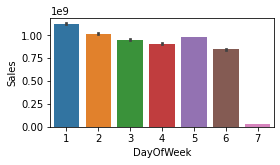

In [43]:
discrete_var=[ 'DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday','StoreType', 'Assortment', 'Promo2', 'PromoInterval']
# Sum estimator used to get total value of on that discrete value , barplot uses mean as the default estimator 
plt.figure(figsize=(4,2))
sns.barplot(x='DayOfWeek',y='Sales',data=df,estimator=sum)
plt.show()



Monday has the highest sales and sunday has the lowest sales. May Roseman shop can be closed on sunday




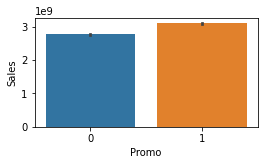

In [44]:
plt.figure(figsize=(4,2))
sns.barplot(x='Promo',y='Sales',data=df,estimator=sum)
plt.show()

Sales is nearly 50% higher when there is a promotion

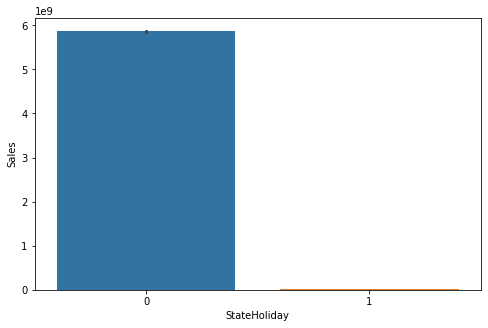

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='StateHoliday',y='Sales',data=df,estimator=sum)
plt.show()



*   Sales on state holiday is very low compared to when there is no state holiday because there is only very few days in a year which is a state holidays 
*   public holiday,  Easter holiday, Christmas are the state holidays as per the  data description



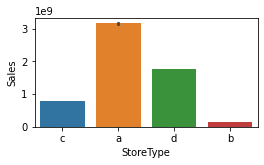

In [46]:
plt.figure(figsize=(4,2))
sns.barplot(x='StoreType',y='Sales',data=df,estimator=sum)
plt.show()




1.   Store type of mode 'a' has the highest sales 
2.   Store type of mode 'b' has the least sales 


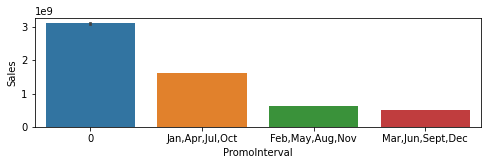

In [47]:
plt.figure(figsize=(8,2))
sns.barplot(x='PromoInterval',y='Sales',data=df,estimator=sum)
plt.show()


The promo running in the month of jan,apr,jun,oct brings more sales compared to other 2 promos 

In [48]:
df.Sales.sum()

5873180623

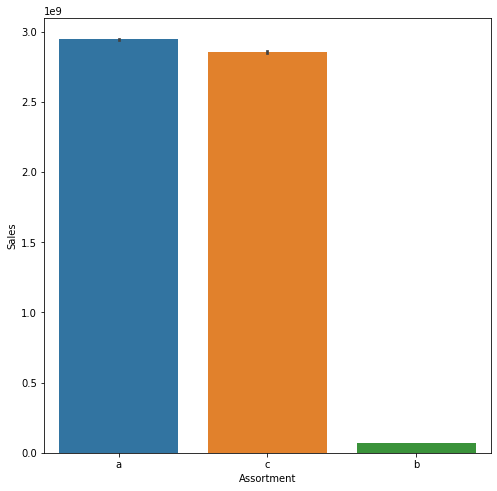

In [49]:
plt.figure(figsize=(8,8))
sns.barplot(x='Assortment',y='Sales',data=df,estimator=sum)
plt.show()



*   Assortment type b is giving least number of sales this may due to variation in number of stores present in asoortment b type




In [50]:
# Lets check the number of stores with respect to assortment
df.groupby('Assortment').size()


Assortment
a    537445
b      8294
c    471470
dtype: int64



*   Number of stores in Assortment b is low compared to a,b
*   As there is no equal propotion of stores to all assortment Sales is also varying



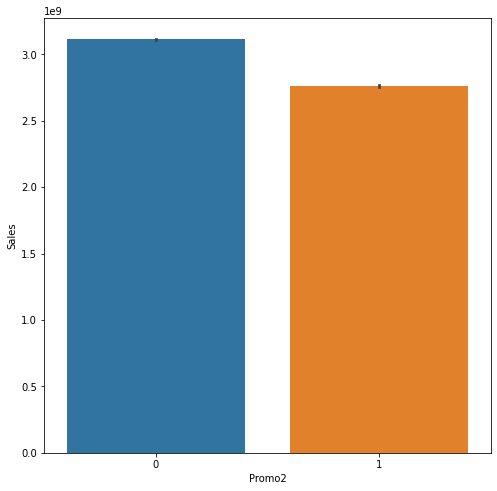

In [51]:

plt.figure(figsize=(8,8))
sns.barplot(x='Promo2',y='Sales',data=df,estimator=sum) 
plt.show()

promo2 is not creating a great impact to sales this may be due to the intervals between the promo2

Checking sales with respect to each stores

Text(0.5, 1.0, 'Average sales of stores')

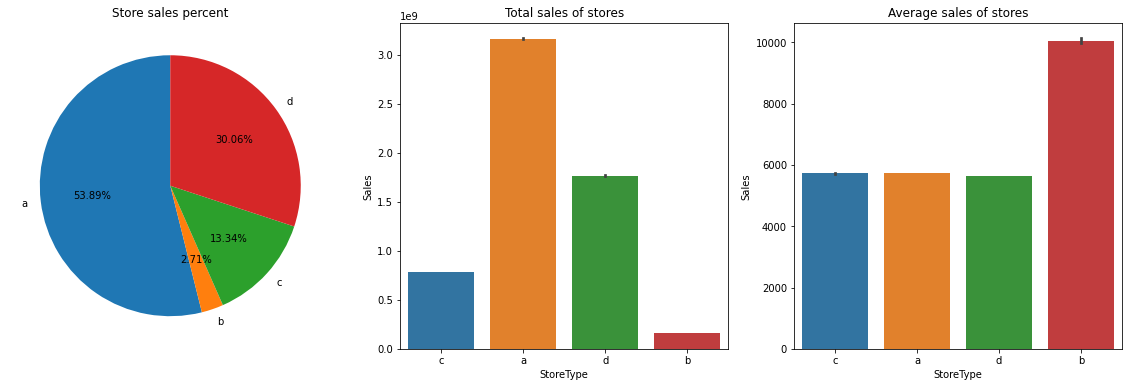

In [52]:
# Creating a dataframe having the store type and the total number of sales done that store
store_sales=pd.DataFrame(df.groupby('StoreType')['Sales'].sum().reset_index())
plt.figure(figsize=(20,6))

# Creating a pie chart to show the contribution of each store towards total sales 
plt.subplot(1,3,1)
plt.pie(store_sales.Sales,labels=store_sales.StoreType,autopct='%1.2f%%',startangle=90)
plt.title('Store sales percent')

# Creating a barplot that shows the total sales done by each type of store 
plt.subplot(1,3,2)
sns.barplot(x='StoreType',y='Sales',data=df,estimator=sum)
plt.title('Total sales of stores')

# Creating a barplot that shows the average sales done by each type of store 
plt.subplot(1,3,3)
sns.barplot(x='StoreType',y='Sales',data=df)
plt.title('Average sales of stores')




*   Store a is contributing nearly half of the the total sales done 
*   Store a is having the highest sales but store b has the highest with respect to the average sales of all stores



Checking sales with respect to assortment

Text(0.5, 1.0, 'Average sales of each Assortment type')

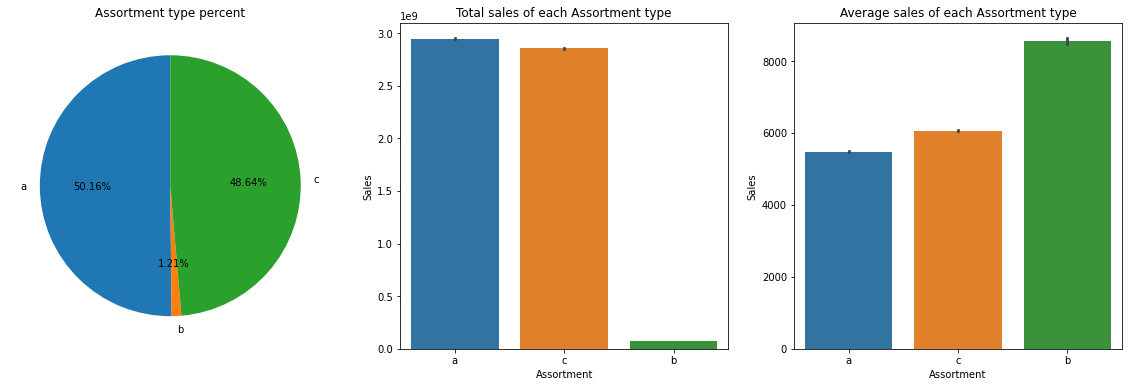

In [53]:
# Creating a dataframe having the Assortment and the total number of sales done that Assortment type
Assortment_sales=pd.DataFrame(df.groupby('Assortment')['Sales'].sum().reset_index())
plt.figure(figsize=(20,6))

# Creating a pie chart to show the contribution of each Assortment type towards total sales 
plt.subplot(1,3,1)
plt.pie(Assortment_sales.Sales,labels=Assortment_sales.Assortment,autopct='%1.2f%%',startangle=90)
plt.title('Assortment type percent')

# Creating a barplot that shows the total sales done by each Assortment type
plt.subplot(1,3,2)
sns.barplot(x='Assortment',y='Sales',data=df,estimator=sum)
plt.title('Total sales of each Assortment type')

# Creating a barplot that shows the average sales done by each Assortment type 
plt.subplot(1,3,3)
sns.barplot(x='Assortment',y='Sales',data=df)
plt.title('Average sales of each Assortment type')



1.   Sales in a and c type assortment is nearly equal and contributes for more than 98% of total sales 
2.   However sales in b is very low but when looking at the average sales of assortment is the highest of all 
 



([<matplotlib.axis.XTick at 0x7f8e4b933310>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 2520x864 with 0 Axes>

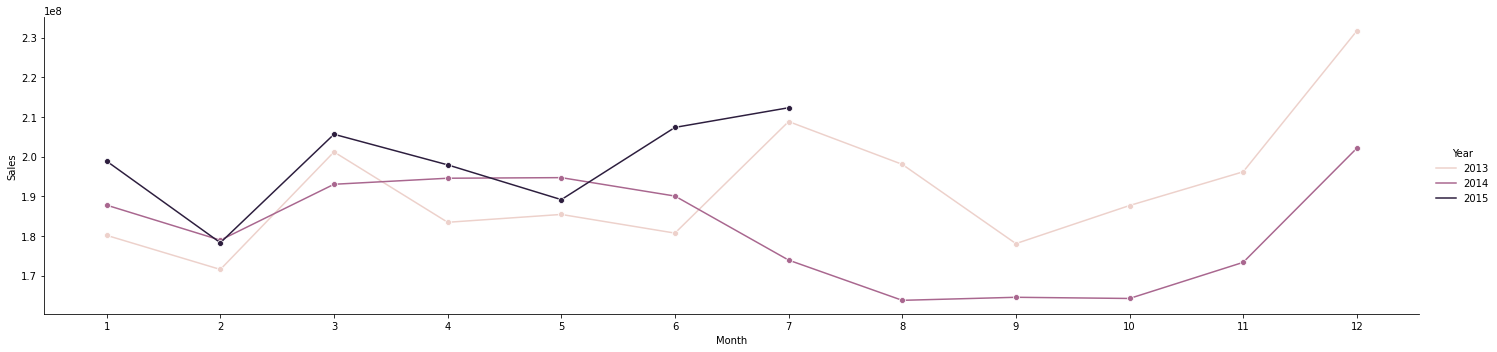

In [54]:
# Creating a line chart to see the trend of sales in every month for the years 
df_sales_month=pd.DataFrame(df.groupby(['Year','Month'])['Sales'].sum()).reset_index()
plt.figure(figsize=(35,12))
sns.relplot(kind='line', data=df_sales_month, x='Month', y='Sales', hue='Year', aspect=4, marker='o')
plt.xticks(range(1,1+(df.Month.max())))



1.   Sales is comperatively low in the month of june to november 
2.   Every year the sales is hitting peak in the maonth of december this may be due to the festive season 



([<matplotlib.axis.XTick at 0x7f8e4b8735e0>,
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''

<Figure size 1440x432 with 0 Axes>

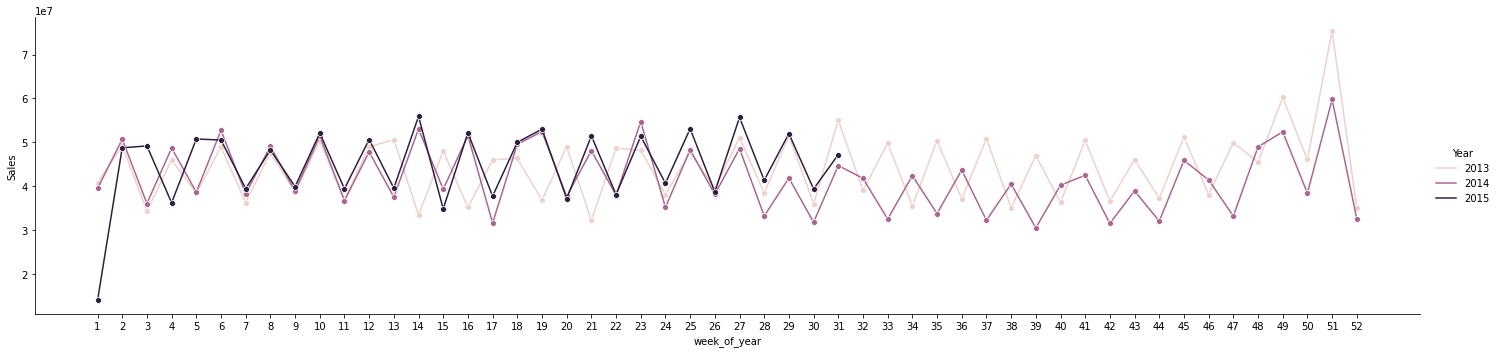

In [55]:
# Creating a line chart to see the trend of sales in every week of the years 
df_sales_week=pd.DataFrame(df.groupby(['Year','week_of_year'])['Sales'].sum()).reset_index()
plt.figure(figsize=(20,6))
sns.relplot(kind='line', data=df_sales_week, x='week_of_year', y='Sales', hue='Year', aspect=4, marker='o')
plt.xticks(range(1,1+(df.week_of_year.max())))

([<matplotlib.axis.XTick at 0x7f8e4b786a60>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

<Figure size 2520x864 with 0 Axes>

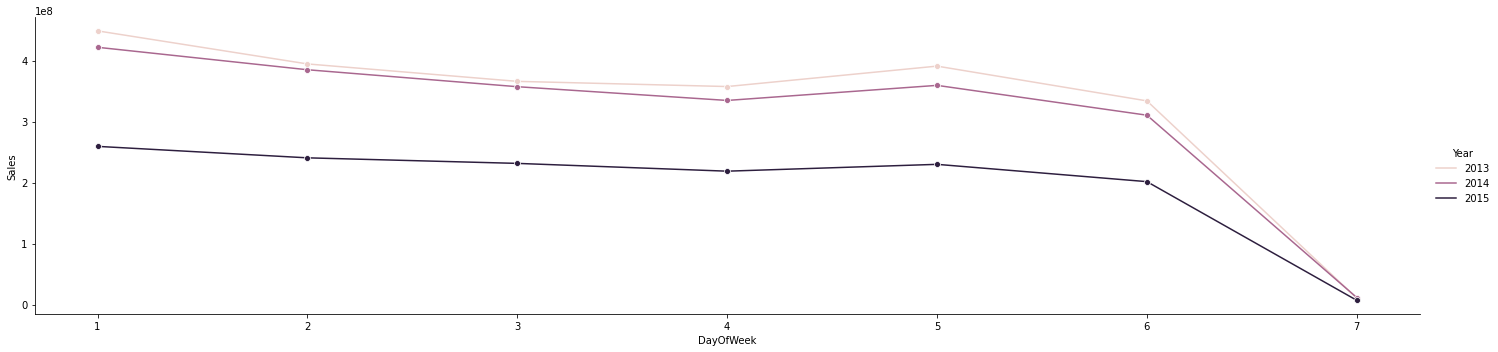

In [56]:
df_sales_day=pd.DataFrame(df.groupby(['Year','DayOfWeek'])['Sales'].sum()).reset_index()
plt.figure(figsize=(35,12))
sns.relplot(kind='line', data=df_sales_day, x='DayOfWeek', y='Sales', hue='Year', aspect=4, marker='o')
plt.xticks(range(1,1+(df.DayOfWeek.max())))

Starting days of the weeks (monday) is getting a higher sales and decreases gradually upto thursday, and a slight increase on friday and saturday.                 
Sales is very poor on sundays

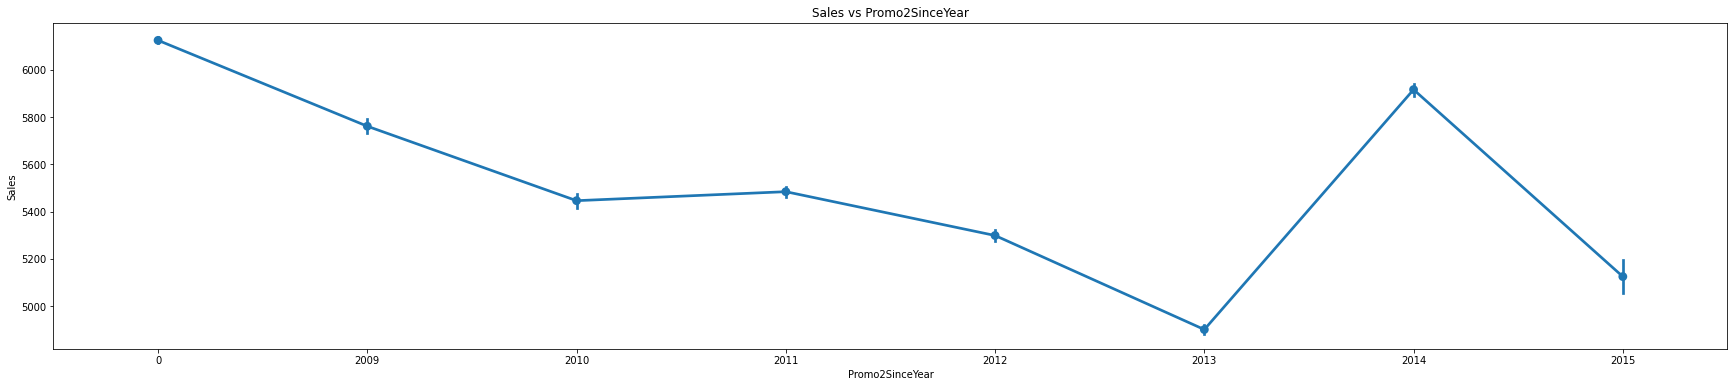

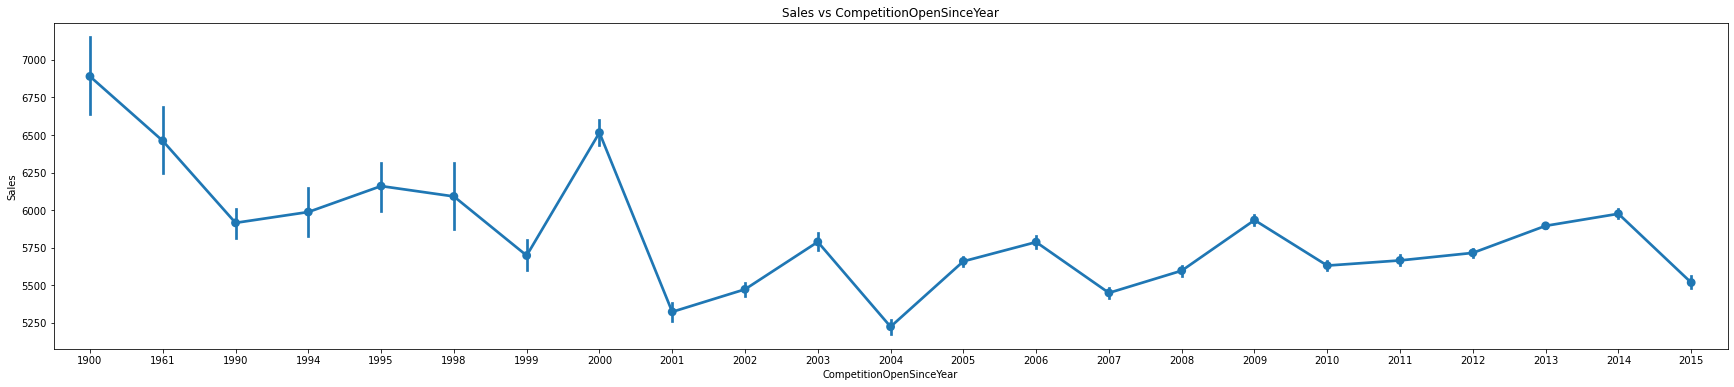

In [57]:
for var in ['Promo2SinceYear','CompetitionOpenSinceYear']:
  plt.figure(figsize=(30,6))
  sns.pointplot(x=var, y='Sales', data=df)
  plt.title(f'Sales vs {var}')



*   Promotion done in the year 2014 has done some miracles as the sales has peaked compared to other years 
*   Due to heavy competition sales is decreasing promo2 is started after 2009 even that did't create a big impact on sales as we could see sales is even decrasing after 2009


<AxesSubplot:>

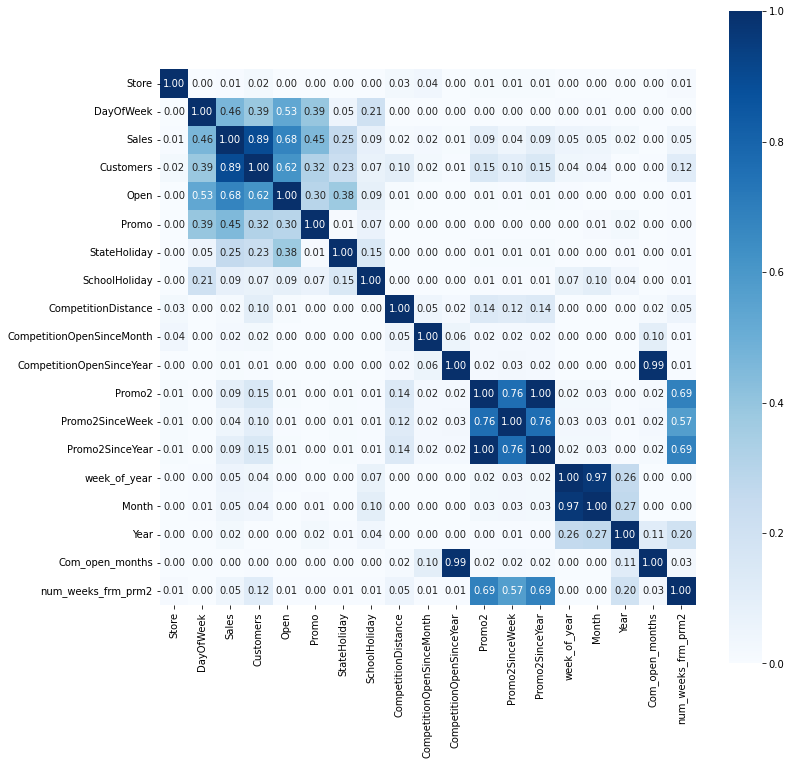

In [58]:
# Creating Corelation heat map to find the corelation among the variables 
corr_df = df.corr().abs()
plt.figure(figsize=(12,12))
sns.heatmap(data=corr_df,annot=True,fmt='.2f',vmin=0,vmax=1,square=True,cmap='Blues')

*   Corelation between sales and customer is high as we know when ny=umber of customers increses simultaenously sales also increses

*   Corelation between week of year and month are high as they represent points in the same timeframe but with different range.
*   correlation between Promo2 with promo2 since week and promo2 since year because promo2 is a binary feature and promo2 since week and promo2 because year have the value of 1 only when promo2 is 1.


*   Competition open number of months is highly correlated with competition open since year because same timeframe but with different range.

*   num_weeks_frm_prm2 is moderately correlated with Promo2, Promo2 since week and Promo2 since year as it is derived from these features.




In [59]:
df.Month.unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8])

In [60]:
range(1,10)

range(1, 10)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

**Feature Selection**

In [85]:
# Backup data set
df_backup=df.copy()

In [65]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,week_of_year,Month,Year,Com_open_months,num_weeks_frm_prm2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008,0,0,0,0,31,7,2015,82,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007,1,13,2010,"Jan,Apr,Jul,Oct",31,7,2015,92,278
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",31,7,2015,103,225
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009,0,0,0,0,31,7,2015,70,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015,0,0,0,0,31,7,2015,3,0


In [66]:
# Dropping the store column as it indicates only the store name
df.drop('Store',axis=1,inplace=True)

In [67]:
# Week , Month and Year is already extracted from date column lets drop it
df.drop('Date',axis=1,inplace=True)

In [68]:
# Dropping the CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns as we have created Com_open_months column
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1,inplace=True)


In [69]:
# Dropping the promo2, Promo2SinceWeek and Promo2SinceYear columns as we have created num_weeks_frm_prm2 column
df.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'],axis=1,inplace=True)

In [70]:
# Dropping month column as the same info present in week of year
df.drop('Month',axis=1,inplace=True)

In [71]:
# From the EDA part its clear that year is not impacting the sales 
df.drop('Year',axis=1,inplace=True)

In [ ]:
# As there is high corelation between sales and customers 
# There are four types of stores each store has different sales values.So creating seperate plots for each store type 

store_a=df.loc[df.StoreType=='a']

store_b=df.loc[df.StoreType=='b']

store_c=df.loc[df.StoreType=='c']

store_d=df.loc[df.StoreType=='d']

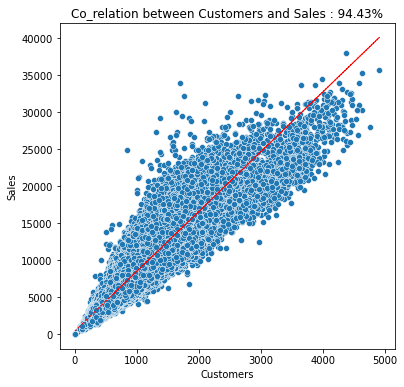

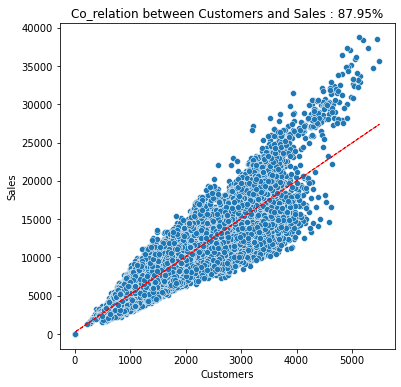

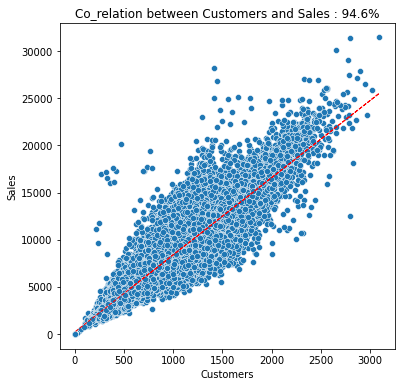

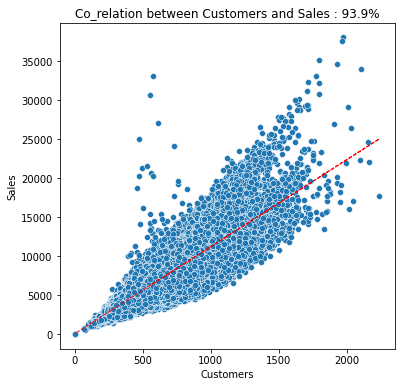

In [148]:
# Creating scatter plot with regression line for Sales and customer for each stores to find outliers in each stores

store_data=[store_a,store_b,store_c,store_d]

for stores in store_data:

  plt.figure(figsize=(6,6))
  sns.scatterplot(x='Customers', y='Sales', data=stores)

  lin_fit = np.polyfit(stores['Customers'], stores['Sales'], 1)
  lin_func = np.poly1d(lin_fit)(stores['Customers'])
  plt.plot(stores['Customers'], lin_func, "r--", lw=1)

  plt.title(f'Co_relation between Customers and Sales, {stores} : {round(stores.Customers.corr(stores.Sales)*100,2)}%')

In [149]:
# store_b seems to have no outlier
# Lets identify other outlier and remove them

a_outlier = df[(df.StoreType == 'a') & ((((df['Sales'] > 40000) | (df['Customers'] > 7000))))].index
c_outlier = df[(df['StoreType'] == 'c') & (((df['Sales'] > 9000) & (df['Customers'] < 500)) |
                                                            ((df['Sales'] < 15000) & (df['Customers'] > 2500)) |
                                                            ((df['Sales'] > 25000) & (df['Customers'] < 2000)) |
                                                             (df['Sales'] > 30000))].index
d_outlier = df[(df['StoreType'] == 'd') & ((df['Sales'] > 17500) & (df['Customers'] < 875) |
                                                            (df['Sales'] > 31000) | (df['Customers'] > 2000))].index

df.drop(a_outlier, inplace=True)
df.drop(c_outlier, inplace=True)
df.drop(d_outlier, inplace=True)

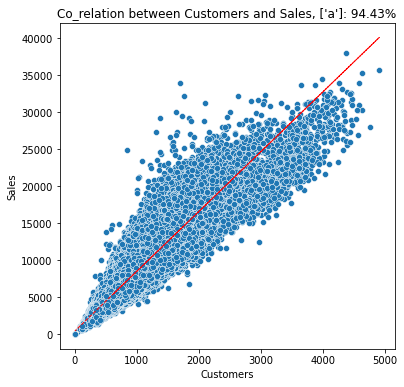

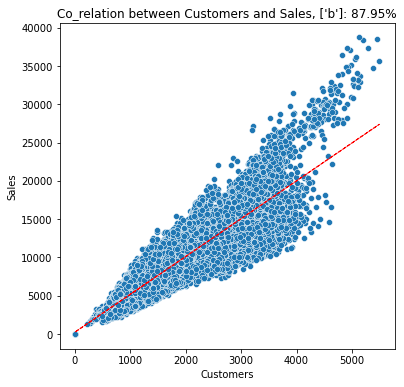

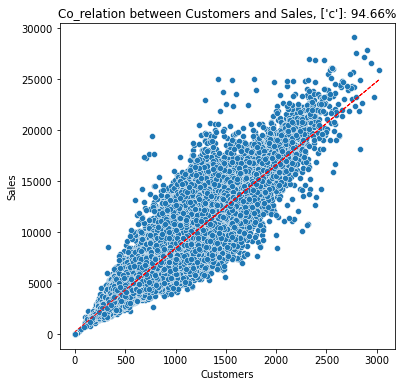

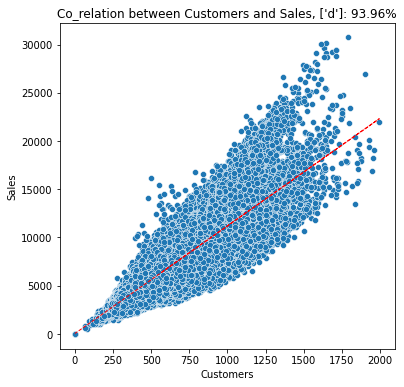

In [152]:
# Looking for those outliers 

store_a=df.loc[df.StoreType=='a']

store_b=df.loc[df.StoreType=='b']

store_c=df.loc[df.StoreType=='c']

store_d=df.loc[df.StoreType=='d']

store_data=[store_a,store_b,store_c,store_d]

for stores in store_data:

  plt.figure(figsize=(6,6))
  sns.scatterplot(x='Customers', y='Sales', data=stores)

  lin_fit = np.polyfit(stores['Customers'], stores['Sales'], 1)
  lin_func = np.poly1d(lin_fit)(stores['Customers'])
  plt.plot(stores['Customers'], lin_func, "r--", lw=1)

  plt.title(f'Co_relation between Customers and Sales, {stores.StoreType.unique()}: {round(stores.Customers.corr(stores.Sales)*100,2)}%')

In [84]:
# Calculating Multicollinearity in continuous Variance Inflation Factor
df

""
0
1
2
3
4
...
1017204
1017205
1017206
1017207


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [76]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***